# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [ ]:
!pip install pyclustering
import pyclustering
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans

     |████████████████████████████████| 2.6 MB 5.5 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=b849272a96ac14bdf4890324af6a5b99e4da988951098c2e7850352cc6d5180d
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Questoin 1
Scatter plot the dataset

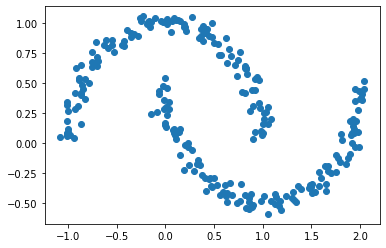

In [ ]:
plt.scatter(x=X[:,0],y=X[:,1])
# sn.scatterplot(x=X[:,0],y=X[:,1])

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

kmeans couldn’t figure out the correct clusters for this datasets,as The goal of kmeans is to group data points into distinct non-overlapping subgroups. It does a very good job when the clusters have a kind of spherical shapes. However, it suffers as the geometric shapes of clusters deviates from spherical shapes.Moreover, it also doesn’t learn the number of clusters from the data and requires it to be pre-defined.and also Applicable only when mean is defined


# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.


4.kmeans couldn’t figure out the correct clusters for this datasets,as The goal of kmeans is to group data points into distinct non-overlapping subgroups. It does a very good job when the clusters have a kind of spherical shapes. However, it suffers as the geometric shapes of clusters deviates from spherical shapes.Moreover, it also doesn’t learn the number of clusters from the data and requires it to be pre-defined.and also Applicable only when mean is defined,as showing figure 


#1.the best k is "2"

In [ ]:
inertias= []
map1 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)  
    inertias.append(kmeanModel.inertia_)
  
    map1[k] = kmeanModel.inertia_

Text(0, 0.5, 'Inertia')

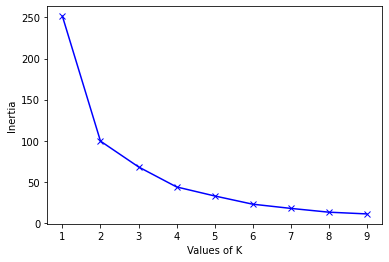

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')

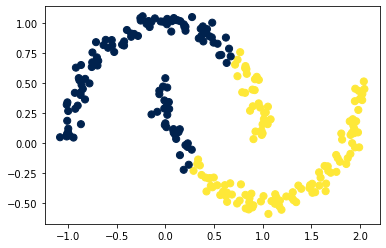

In [ ]:
#with k=2

kmeanModel = KMeans(2,random_state=0).fit_predict(X)
plt.scatter(x=X[:,0],y=X[:,1],c=kmeanModel,s=50,cmap='cividis')

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?


##3.beacuse clique handle noisy data ,outliers ,Identify the subspaces that contain clusters and detect number of clusters but k-means don't

Amount of clusters: 2


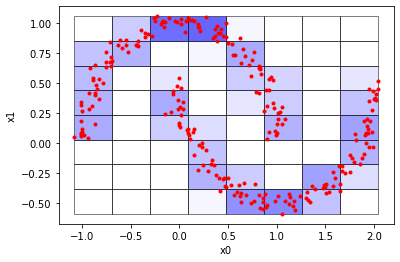

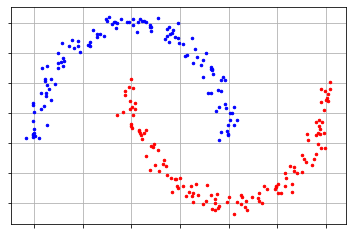

In [ ]:
# read two-dimensional input data 'Target'

# create CLIQUE algorithm for processing
intervals = 8  # defines amount of cells in grid in each dimension
threshold = 0  # lets consider each point as non-outlier
clique_instance = clique(X, intervals, threshold)

# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))

# visualize clustering results
clique_visualizer.show_grid(cells, X)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(X, clusters, noise)  # show clustering results

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?


#4: 1.number of cluster in case of clique is "4" beacase all block in each neighbouring cluster have a dense with data (points more 6)

#2.beacuse it Unable to handle noisy data and outliers & Not suitable to discover clusters with non-convex shapes


In [ ]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

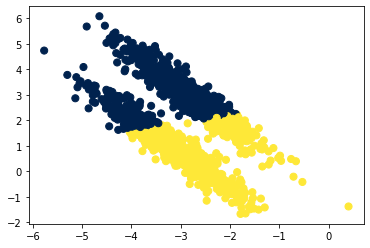

In [ ]:
#1,3
X=X_aniso
kmeanModel = KMeans(2,random_state=0).fit_predict(X)
plt.scatter(x=X[:,0],y=X[:,1],c=kmeanModel,s=50,cmap='cividis')

Amount of clusters: 4


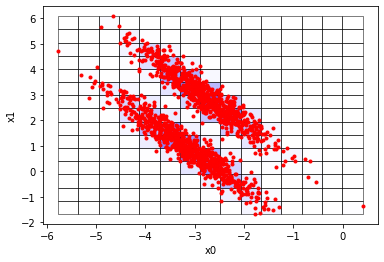

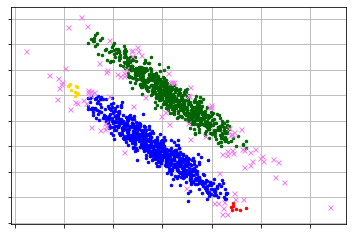

In [ ]:
#2,3

# create CLIQUE algorithm for processing
intervals = 15  # defines amount of cells in grid in each dimension
threshold = 6  #  block that contains 6 or less points is considered as a outlier as well as its points
clique_instance = clique(X, intervals, threshold)

# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))

# visualize clustering results
clique_visualizer.show_grid(cells, X)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(X, clusters, noise)  # show clustering results

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [ ]:
def pca(X):
   # normalize the features
   X = (X - np.mean(X , axis = 0))
   
   # compute the covariance matrix

   X = np.matrix(X)
   cov = (X.T * X) / X.shape[0]

   print('cov \n', cov)
   print()

   # perform eigen_vectors

   eigenvalues,eigen_vectors = np.linalg.eigh(cov)
   print('eigen_vectors\n',eigen_vectors)
   print()

   print('eigenvalues\n',eigenvalues)
   sorted_index = np.argsort(eigenvalues)[::-1]
   sorted_eigenvectors = eigen_vectors[:,sorted_index]


   print()

   U_reduced = sorted_eigenvectors[:,:k]
   transformed_data=np.dot(U_reduced.T,X.T).T
   print('transformed_data\n',transformed_data)

   return eigen_vectors,eigenvalues ,transformed_data

pca(X)



cov 
 [[ 0.76138567 -0.1911642 ]
 [-0.1911642   0.24447784]]

eigen_vectors
 [[-0.31306686 -0.94973109]
 [-0.94973109  0.31306686]]

eigenvalues
 [0.18146297 0.82440053]

transformed_data
 [[ 0.35457927  0.26282587]
 [-0.55063268 -0.07912451]
 [ 1.29106492 -0.02050071]
 [ 0.63122066 -0.50222636]
 [ 1.45932139  0.39209846]
 [-0.47672944  0.61619472]
 [-0.98042708  0.42692603]
 [-0.61891903  0.62926093]
 [-0.48673305 -0.15800825]
 [ 1.41157808  0.16351977]
 [-1.01015237  0.30800563]
 [-1.29265801  0.10265884]
 [-1.4176105  -0.28607287]
 [-1.39749481 -0.4830077 ]
 [ 0.89233047 -0.48373232]
 [-1.42026574 -0.06747767]
 [-0.80700784  0.4510427 ]
 [-0.34902044 -0.40150631]
 [-0.38530754  0.59319824]
 [-0.21571237 -0.41044944]
 [-1.40224907 -0.66851998]
 [-0.21914725 -0.24984802]
 [ 1.35045753  0.3848222 ]
 [ 0.87789313 -0.51263022]
 [-0.56658619  0.56599683]
 [ 0.29050729 -0.6057572 ]
 [ 0.50534009 -0.58618346]
 [-0.50113896 -0.06147317]
 [-0.08882776 -0.49209652]
 [ 1.37843735  0.63816557]
 

(matrix([[-0.31306686, -0.94973109],
         [-0.94973109,  0.31306686]]),
 array([0.18146297, 0.82440053]),
 matrix([[ 0.35457927,  0.26282587],
         [-0.55063268, -0.07912451],
         [ 1.29106492, -0.02050071],
         [ 0.63122066, -0.50222636],
         [ 1.45932139,  0.39209846],
         [-0.47672944,  0.61619472],
         [-0.98042708,  0.42692603],
         [-0.61891903,  0.62926093],
         [-0.48673305, -0.15800825],
         [ 1.41157808,  0.16351977],
         [-1.01015237,  0.30800563],
         [-1.29265801,  0.10265884],
         [-1.4176105 , -0.28607287],
         [-1.39749481, -0.4830077 ],
         [ 0.89233047, -0.48373232],
         [-1.42026574, -0.06747767],
         [-0.80700784,  0.4510427 ],
         [-0.34902044, -0.40150631],
         [-0.38530754,  0.59319824],
         [-0.21571237, -0.41044944],
         [-1.40224907, -0.66851998],
         [-0.21914725, -0.24984802],
         [ 1.35045753,  0.3848222 ],
         [ 0.87789313, -0.51263022],
  

# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [ ]:
def init_centroids(X, k):
   m, n = X.shape
   centroids = np.zeros((k, n))
   idx = np.random.randint(0, m, k)
   
   for i in range(k):
       centroids[i,:] = X[idx[i],:]
   
   return centroids


# centroid function
def find_closest_centroids(X, centroids):
   m = X.shape[0]
   k = centroids.shape[0]
   idx = np.zeros(m)
   
   
   for i in range(m):
       min_dist = 1000000
       for j in range(k):
           dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
           if dist < min_dist:
               min_dist = dist
               idx[i] = j
   
   return idx

# centroid maker
def compute_centroids(X, idx, k):
   m, n = X.shape
   centroids = np.zeros((k, n))
   
   for i in range(k):
       indices = np.where(idx == i)
       centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
   
   return centroids

# k means function
def run_k_means(X, k):
    
   initial_centroids =  init_centroids(X, k)


   m, n = X.shape
   k = initial_centroids.shape[0]
   idx = np.zeros(m)
   centroids = initial_centroids
   
   for i in range(250):
       idx = find_closest_centroids(X, centroids)
       centroids = compute_centroids(X, idx, k)
   
   return idx, centroids


In [ ]:

# apply k means 
idx, centroids = run_k_means(X, 2)
print(len(idx))
print()
print(centroids)


250

[[-0.21580413  0.58471364]
 [ 1.19954086 -0.07033668]]
